In [14]:
# download the dataset
# from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print()
print(type(mnist))
print()
print('train:', mnist.train.num_examples)
print('test:', mnist.test.num_examples)
print('validation:', mnist.validation.num_examples)
print()
print('Shape of training images:', mnist.train.images.shape)
print('Shape of training labels:', mnist.train.labels.shape)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>

train: 55000
test: 10000
validation: 5000

Shape of training images: (55000, 784)
Shape of training labels: (55000, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


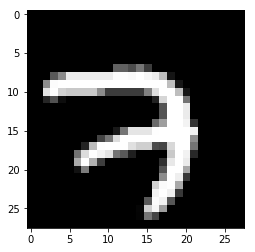

In [28]:
# show the image
import numpy as np
import matplotlib.pyplot as plt

img = mnist.train.images[0]
img = np.reshape(img, (28, 28))

print(mnist.train.labels[0])
plt.imshow(img, cmap=plt.cm.gray) 
plt.show()


In [22]:
#  Preprocessing Character Images
img = mnist.train.images[0]
print(min(img), max(img))

# the values range [0,1]

0.0 0.9960785


Before: (28, 28)


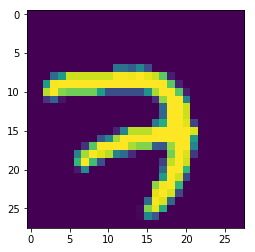

After removing the blank areas: (20, 20)


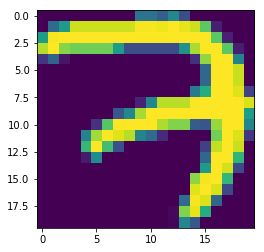

After redo the size: (28, 28)


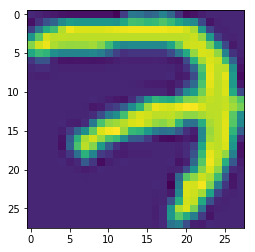

In [180]:
import numpy as np
import cv2

print('Before:', img.shape)
plt.imshow(img)
plt.show()

yu = 0
yd = 0
xu = 0
xd = 0
for i in range(28):
    if max(img[i]) > 0:
        yd = i
    if max(img[-i-1]) > 0:
        yu = -i+27
        
    if max(img[:, i]) > 0:
        xd = i
    if max(img[:, -i-1]) > 0:
        xu = -i+27
a = img[yu:yd+1, xu:xd+1]

print('After removing the blank areas:', a.shape)
plt.imshow(a)
plt.show()

b = cv2.resize(a, (28, 28), interpolation = cv.INTER_CUBIC)
print('After redo the size:', b.shape)
plt.imshow(b)
plt.show()